In [2]:
import json
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

sns.set_style("dark")

In [3]:
with open("evaluation_results.json") as json_data:
    data = json.load(json_data)
    json_data.close()

In [4]:
def plot_barcharts_attribute(key):
    for algo in data:
        attribute = algo[key]
        attribute = [0 if v is None else v for v in attribute]
        index = range(len(attribute))

        plt.figure(figsize=(10, 5))
        plt.title(f"{key}: {algo['Algorithm']}")
        plt.bar(index, attribute)
        plt.show()

def plot_comparison_barchart(algo1, algo2, key):
    algo_found = 0
    bar_width = 0.35
    plt.figure(figsize=(10, 5))

    map_names = data[0]["Map Names"]
    index = range(len(map_names))

    for algo in data:
        if algo["Algorithm"] in [algo1, algo2]:
            algo_found += 1
            key_data = algo[key]
            key_data = [0 if v is None else v for v in key_data]

            if algo_found == 1:
                plt.bar(index, key_data, bar_width, label=algo["Algorithm"])
            else:
                plt.bar([i + bar_width for i in index], key_data, bar_width, label=algo["Algorithm"])
        else:
            next

    plt.xticks([i + bar_width / 2 for i in index], map_names, rotation=30, ha="center")
    plt.xlabel("Map Number")
    plt.ylabel(key)
    plt.title(f"Comparison of {key} between {algo1} and {algo2}")
    plt.legend()
    plt.show()

In [5]:
data[3].keys()

dict_keys(['Algorithm', 'Map Names', 'Success Rate', 'Path Length', 'Time Taken To Calculate', 'Energy To Traverse', 'CPU Usage', 'First success', 'Memory Used'])

In [6]:
data[0]["Path Length"]

[337.0782104868023,
 792.5016587651686,
 967.3372285648516,
 1026.722871427475,
 973.8569978244955,
 801.5706345359787,
 927.6488450227815,
 815.477272147528,
 1136.0365799264596,
 1024.1147904132624,
 1277.6072144624386,
 1043.1168824543179,
 706.3229432149768,
 666.4629867976533,
 1213.3056992722743,
 509.8893936688456,
 198.9482681718911,
 840.9310242291887,
 717.8254685319179,
 881.8528137423862,
 242.33809511662494,
 1060.9595949289387,
 419.32085117392216,
 178.99494936611669,
 1055.1858582251286,
 660.8427124746206,
 379.99704140717165,
 1358.1656556895975,
 1321.383909759077,
 239.56349186104129,
 684.1909088590111,
 532.3452377915617,
 170.4142135623731,
 782.1219330882006,
 843.2295808265259,
 620.5756851698607,
 1693.3759005323666,
 None,
 1190.6875169902967,
 409.14927829866826,
 979.7199128346475,
 399.8233764908631,
 544.7056274847728,
 1103.923015002479,
 736.5168106668164,
 695.315800540039,
 790.5361466505735,
 1111.7199128346476,
 220.05382386916284,
 980.999133448227

In [7]:
data[1]["Path Length"]

[342.620402378684,
 1281.280465613796,
 None,
 1009.4400852347806,
 953.4929650262231,
 866.9467151151382,
 None,
 1605.3765474384054,
 1130.1423923009434,
 1810.2605094708556,
 1555.961805024267,
 1303.96422694853,
 1014.6321210892085,
 750.1992480160114,
 1266.2549572155083,
 516.0858068294162,
 193.01256401246718,
 831.5695033001695,
 740.965518364018,
 876.6450099483845,
 225.11611088885016,
 None,
 390.57991618663766,
 165.52955442907347,
 1321.2217622011624,
 None,
 368.9232436787851,
 None,
 1466.832285741601,
 231.998371646569,
 723.5195122737377,
 614.2753022794791,
 170.1402638878725,
 None,
 1223.4377240127217,
 660.9922824236425,
 None,
 None,
 None,
 576.8572813299662,
 None,
 423.43840334060053,
 535.9961371620848,
 1239.180536260477,
 809.4234817291073,
 670.1598033804366,
 885.1519440148866,
 1215.7041627477183,
 247.52478312956887,
 None]

## Time to Compute

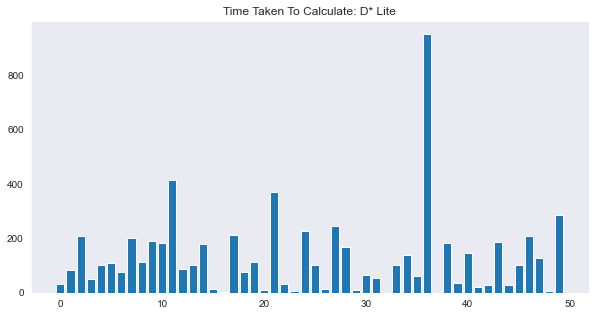

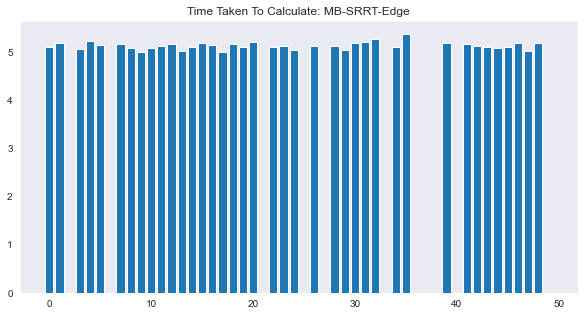

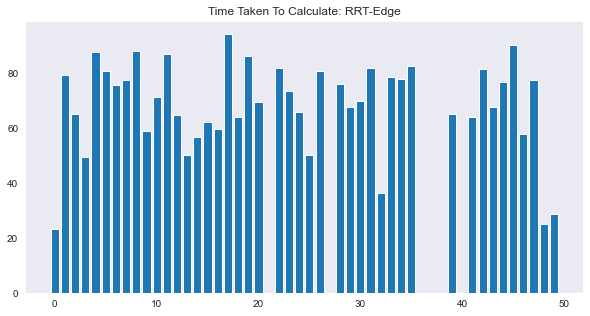

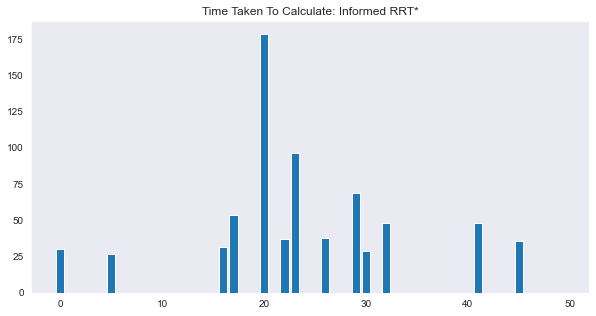

In [8]:
plot_barcharts_attribute("Time Taken To Calculate")

In [9]:
optimal = data[0]["Path Length"]
mb_srrt_edge = data[1]["Path Length"]
rrt_edge = data[2]["Path Length"]
informed_srrt_edge = data[3]["Path Length"]

Maps where each algorithm found a solution

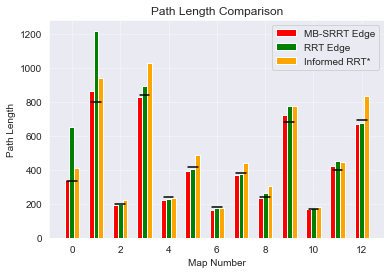

In [10]:

indices = np.arange(len(optimal))
filtered_indices = [i for i in indices if optimal[i] is not None and mb_srrt_edge[i] is not None and rrt_edge[i] is not None and informed_srrt_edge[i] is not None]

optimal_filtered = [optimal[i] for i in filtered_indices]
mb_srrt_edge_filtered = [mb_srrt_edge[i] for i in filtered_indices]
rrt_edge_filtered = [rrt_edge[i] for i in filtered_indices]
informed_srrt_edge_filtered = [informed_srrt_edge[i] for i in filtered_indices]

adjusted_indices = np.arange(len(filtered_indices))

# Bar width
bar_width = 0.2

# Create the bar chart
plt.bar(adjusted_indices - bar_width, mb_srrt_edge_filtered, width=bar_width, label='MB-SRRT Edge', color='red')
plt.bar(adjusted_indices, rrt_edge_filtered, width=bar_width, label='RRT Edge', color='green')
plt.bar(adjusted_indices + bar_width, informed_srrt_edge_filtered, width=bar_width, label='Informed RRT*', color='orange')

# Plot the optimal path length as a flat grey line
for i, value in enumerate(optimal_filtered):
    plt.plot([i - bar_width, i + bar_width], [value, value], color='black', linestyle='-', linewidth=1.5)

# Add titles and labels
plt.title('Path Length Comparison')
plt.xlabel('Map Number')
plt.ylabel('Path Length')

# Add grid lines
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

# Add legend
plt.legend()

# Show the plot
plt.show()

Time to find these paths:

In [11]:
param = "Time Taken To Calculate"

optimal = data[0][param]
mb_srrt_edge = data[1][param]
rrt_edge = data[2][param]
informed_srrt_edge = data[3][param]

In [12]:
optimal_filtered = [optimal[i] for i in filtered_indices]
mb_srrt_edge_filtered = [mb_srrt_edge[i] for i in filtered_indices]
rrt_edge_filtered = [rrt_edge[i] for i in filtered_indices]
informed_srrt_edge_filtered = [informed_srrt_edge[i] for i in filtered_indices]

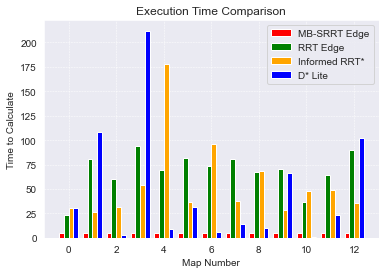

In [14]:
adjusted_indices = np.arange(len(filtered_indices))

# Bar width
bar_width = 0.2

# Create the bar chart
plt.bar(adjusted_indices - 1.5 * bar_width, mb_srrt_edge_filtered, width=bar_width, label='MB-SRRT Edge', color='red')
plt.bar(adjusted_indices - 0.5 * bar_width, rrt_edge_filtered, width=bar_width, label='RRT Edge', color='green')
plt.bar(adjusted_indices + 0.5 * bar_width, informed_srrt_edge_filtered, width=bar_width, label='Informed RRT*', color='orange')
plt.bar(adjusted_indices + 1.5 * bar_width, optimal_filtered, width=bar_width, label='D* Lite', color='blue')

# # Plot the optimal path length as a flat grey line
# for i, value in enumerate(optimal_filtered):
#     plt.plot([i - bar_width, i + bar_width], [value, value], color='black', linestyle='-', linewidth=1.5)

# Add titles and labels
plt.title('Execution Time Comparison')
plt.xlabel('Map Number')
plt.ylabel('Time to Calculate')

# Add grid lines
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

# Add legend
plt.legend()

# Show the plot
plt.show()